In [0]:
!pip install qiskit

In [0]:
#Selecting least busy IBM Quantum Computer
from qiskit.providers.ibmq import least_busy

In [3]:
#Importing Qiskit

import qiskit
qiskit.__qiskit_version__

#Verifying IBM Account
from qiskit import IBMQ
IBMQ.save_account('7284762277e277284e0ed8647232af7941e076d7eacffa2efd60d5fd7b1279563e80b8983d3b727b86f026d1d54e1cd9552679053fa9731c527ecaa0ac38e6cf')
IBMQ.load_account()


AssertionError: ignored

In [0]:
#Importing libraries 
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np
from qiskit.visualization import plot_histogram

In [0]:
#I dont think this does anything?
H = (1/(np.sqrt(2))) * np.array([[1,1],[1,-1]])
I = np.identity(2,int)
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])

Z_I = np.kron(Z,I)
I_Z = np.kron(I,Z)

In [0]:
#Creating Oracle that will mark states  |101⟩  and  |110⟩ 

def phase_oracle(circuit, register):
    circuit.cz(qr[2],qr[0]) #Creating a controlled Z gate with Qubit 3 controlling Qubit 1
    circuit.cz(qr[2],qr[1]) #.... Qubit controlling Qubit 3 controlling Qubit 2

In [0]:
def n_controlled_Z(circuit, controls, target):
    """Implement a Z gate with multiple controls"""
    if (len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls is not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)

In [0]:
#Creating Inversion about the mean
def inversion_about_average(circuit, register, n, barriers):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
     
    if barriers:
        circuit.barrier()
    
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    
    if barriers:
        circuit.barrier()
    
    circuit.x(register)
    circuit.h(register)

In [0]:
barriers = True

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

if barriers:
    groverCircuit.barrier()

phase_oracle(groverCircuit, qr)

if barriers:
    groverCircuit.barrier()

inversion_about_average(groverCircuit, qr, 3, barriers)

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr,cr)

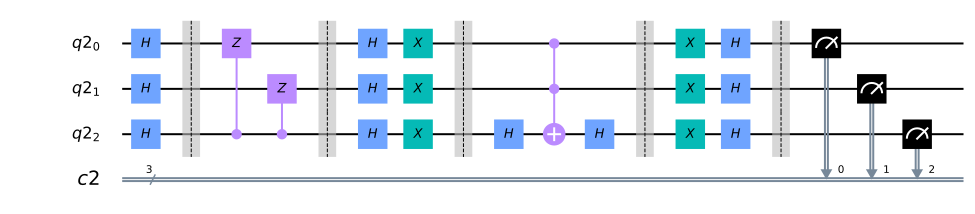

In [0]:
groverCircuit.draw(output="mpl")

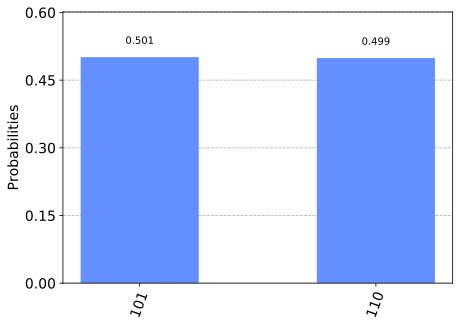

In [0]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [0]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

In [0]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(groverCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

In [0]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer)